# Import - Load  

In [ ]:

# Load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:
from sklearn import preprocessing

In [ ]:
%cd /content/drive/MyDrive/Võ Huyền Khánh Mây
!ls

/content/drive/MyDrive/Võ Huyền Khánh Mây
'Bản sao của Bản sao của Final.ipynb'   test.csv	   train.csv
 Final.ipynb			       'Titanic Project'


In [ ]:
train = pd.read_csv("train.csv")

# Analyzing - Visualizing Data


In [ ]:
display(train.head())

print(train.info())
print(train.info())
print(train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

In [ ]:
row,col = train.shape
print("Có {} người với {} biến".format(row,col))
print(train.isnull().sum())

Có 891 người với 12 biến
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


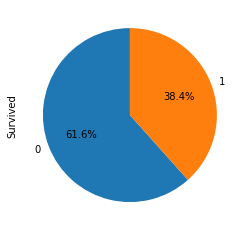

In [ ]:
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90)

**Missing Values Procession**

In [ ]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

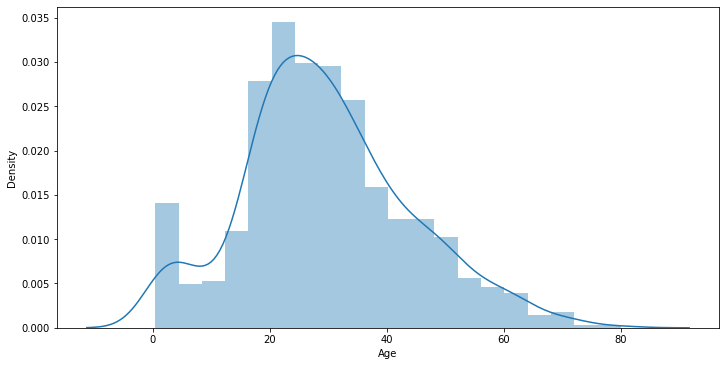

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.distplot(train.Age)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.plot()

Ta thấy tuổi hành khách phân bố không đồng đều -> Không fill bằng mean được

Ta gom hành khách thành các độ tuổi dựa vào Title, sau đó lấy fill missing values trung bình các giá trị trong nhóm value đó thuộc về.

In [ ]:
extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train["Title"] = extracted_titles
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
train["Age"] = train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"))

Data của Cabin gần như khuyết hoàn toàn, ta bỏ đi dữ liệu này

In [ ]:
train.drop("Cabin", inplace=True, axis=1)

Chỉ có 2 missing values ở phần Embarked -> ta fill bằng giá trị xuất hiện nhiều nhất là càng S

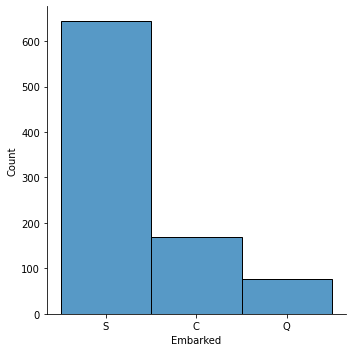

In [ ]:
#Embarked: Xuất phát cảng
sns.displot(train['Embarked'])
plt.show()

In [ ]:
train["Embarked"] = train["Embarked"].fillna("S")

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [ ]:
#Bỏ đi các dữ liệu không có giá trị
train.drop(["PassengerId"], inplace=True, axis=1)

## Visualizing

In [ ]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.754659,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.277179,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.773973,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.898148,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


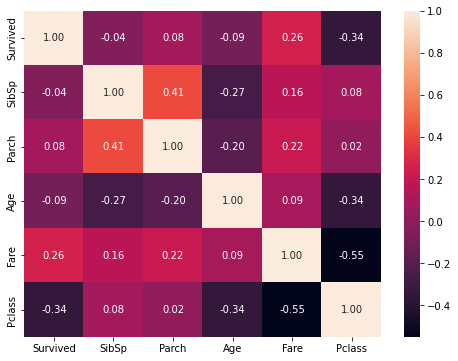

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare","Pclass"]].corr(),annot=True, fmt = ".2f")

Nhận xét:


*   SibSp + Parch có tỉ số thấp -> nên gom lại thành 1 feature mới
*   PClass và Fare có tương quan cao -> nên so sánh cùng nhau



**Survived**

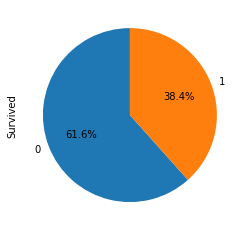

In [ ]:
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90)


**Gender**

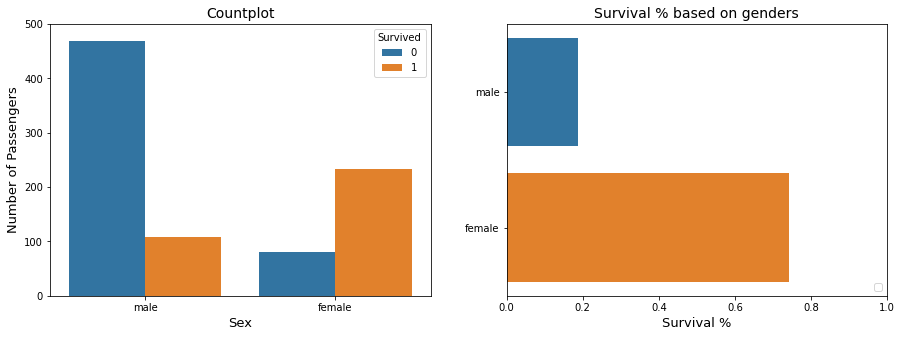

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Sex',data=train,hue='Survived',ax=ax1)
ax1.set_ylim([0,500])
ax1.set_xlabel('Sex',fontdict={'fontsize':13})
ax1.set_ylabel('Number of Passengers',fontdict={'fontsize':13})
ax1.set_title('Countplot',fontdict={'fontsize':14})
plt.legend(["blue", "green"], loc ="lower right")

sns.barplot(x='Survived',y='Sex',data=train,errwidth=0,ax=ax2)
ax2.set_xlim([0,1])
ax2.set_xlabel('Survival %',fontdict={'fontsize':13})
ax2.set_ylabel('',fontdict={'fontsize':13})
ax2.set_title('Survival % based on genders',fontdict={'fontsize':14})

plt.show()

Tỉ lệ Female sống sót cao hơn Male khá đáng kể

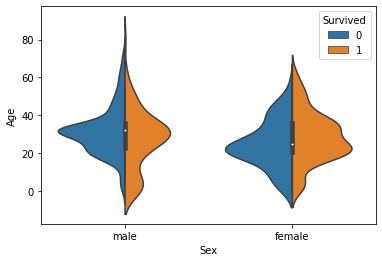

In [ ]:
sns.violinplot(data=train, x="Sex", y="Age", hue="Survived", split=True)
plt.show()

Cả trẻ em nam và nữ đều có tỉ lệ sống sót cao.
Ở những người cao tuổi (>60) thì các cụ bà có tỉ lệ sống sót cao hơn các cụ ông

**Name**

In [ ]:
train[["Name"]].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [ ]:
print(train["Survived"].groupby(train["Title"]).mean().sort_values(ascending=False))

Title
Sir         1.000000
Countess    1.000000
Ms          1.000000
Mme         1.000000
Lady        1.000000
Mlle        1.000000
Mrs         0.792000
Miss        0.697802
Master      0.575000
Col         0.500000
Major       0.500000
Dr          0.428571
Mr          0.156673
Jonkheer    0.000000
Don         0.000000
Rev         0.000000
Capt        0.000000
Name: Survived, dtype: float64


Có sự liên quan giữa sống sót và Title.
Có thể phân ra các nhóm:

* higher = the Countess, Mlle, Lady, Ms , Sir, Mme, Mrs, Miss, Master
* neutral = Major, Col, Dr
* lower = Mr, Rev, Jonkheer, Don, Capt

**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


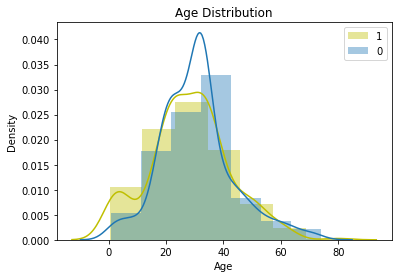

In [ ]:
# Survived by age
sns.distplot(train[train.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.distplot(train[train.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

Dựa theo Title + Age, trẻ em có tỉ lệ sống sót cao nhất.

-> Nên chia band tuổi.

*  Children: 0 - 10 tuổi
*   Adolescence: 11 - 18 tuổi
*   Young Adult: 19 - 31 tuổi
*   Adult: 32 - 64 tuổi
* Elderly: trên 64 tuổi


**Embarked**

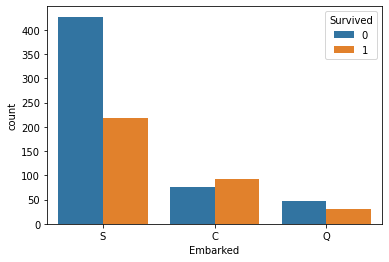

In [ ]:
sns.countplot(data=train,x='Embarked',hue='Survived');

Có đông người xuất phát từ cảng S và cảng S cũng là cảng có tỉ lệ sống sót cao nhất. Tuy nhiên, chỉ ở cảng C là số người sống cao hơn số người chết

-> Giữ Embarked

**Pclass/Fare**

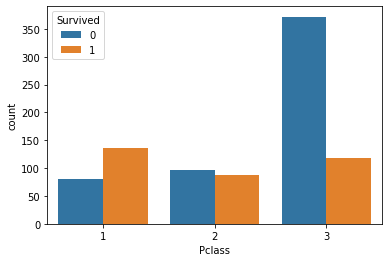

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.show()

print(train["Survived"].groupby(train["Pclass"]).mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


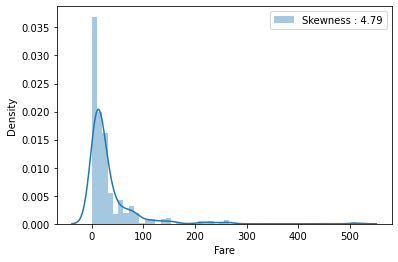

In [ ]:
g = sns.distplot(train["Fare"], label="Skewness : %.2f"%(train["Fare"].skew()))
g = g.legend(loc="best")

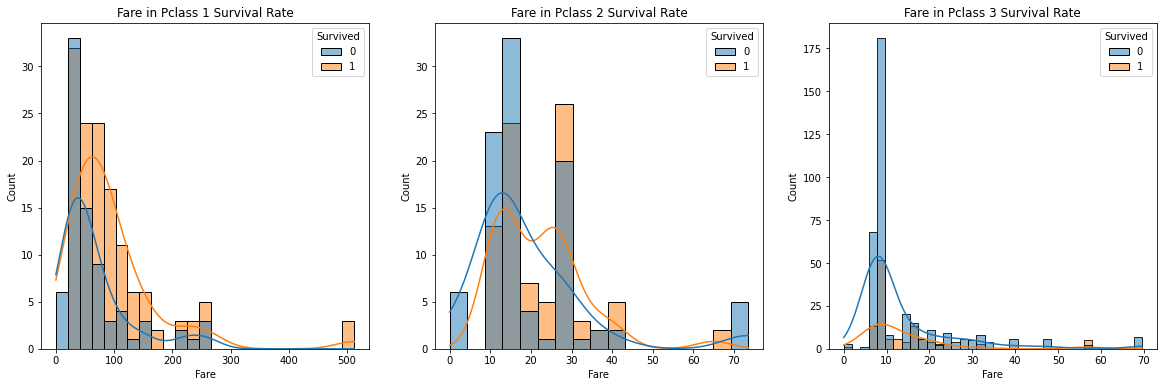

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i, pc in enumerate(sorted(train["Pclass"].unique())):
    sns.histplot(data=train[train["Pclass"]==pc], x="Fare", hue="Survived", kde=True, ax=ax[i])
    ax[i].set_title(f"Fare in Pclass {pc} Survival Rate")

Những hành khách vé đắt tiền có tỉ lệ sống sót cao hơn hẳn. Tuy vậy một số khách hạng 2 và 1 vẫn chết, đặc biệt là những người có tiền vé rẻ.

-> Giữ Pclass, chia band Fare

**SibSp & Parch**

SibSp = Sibling or Spouse number

Parch = Parent or Children number

In [ ]:
train['FamilyMember']=train['SibSp']+train['Parch']
train.drop(['SibSp','Parch'],inplace=True,axis=1)

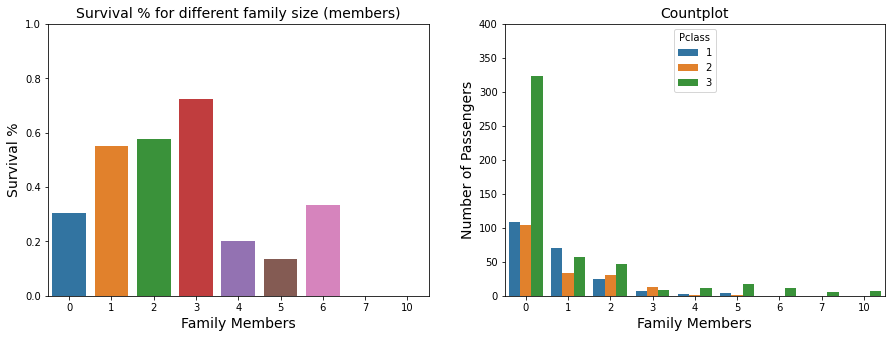

FamilyMember
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='FamilyMember',y='Survived',data=train,errwidth=0,ax=ax1)
ax1.set_title('Survival % for different family size (members)',fontdict={'fontsize':14})
ax1.set_ylim([0,1])
ax1.set_xlabel('Family Members',fontdict={'fontsize':14})
ax1.set_ylabel('Survival %',fontdict={'fontsize':14})


sns.countplot(x='FamilyMember',data=train,hue='Pclass',ax=ax2)
ax2.set_title('Countplot',fontdict={'fontsize':14})
ax2.set_ylim([0,400])
ax2.set_xlabel('Family Members',fontdict={'fontsize':14})
ax2.set_ylabel('Number of Passengers',fontdict={'fontsize':14})

plt.show()
print(train["Survived"].groupby(train["FamilyMember"]).mean().sort_values(ascending=False))

Tiếp tục tạo ra feature Family Size


*   Alone = 0 người nhà
*   Small = 1-3 người nhà
*   Medium = 4 - 6 người nhà
*   Large = trên 7 người nhà

In [ ]:
train['FamilyMember'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [ ]:
train['FamilySize'] = pd.cut(train['FamilyMember'],bins=[0,1,4,7,100],labels=['Alone','Small','Medium','Large'],right=False)
train['FamilySize'].unique()

['Small', 'Alone', 'Medium', 'Large']
Categories (4, object): ['Alone' < 'Small' < 'Medium' < 'Large']

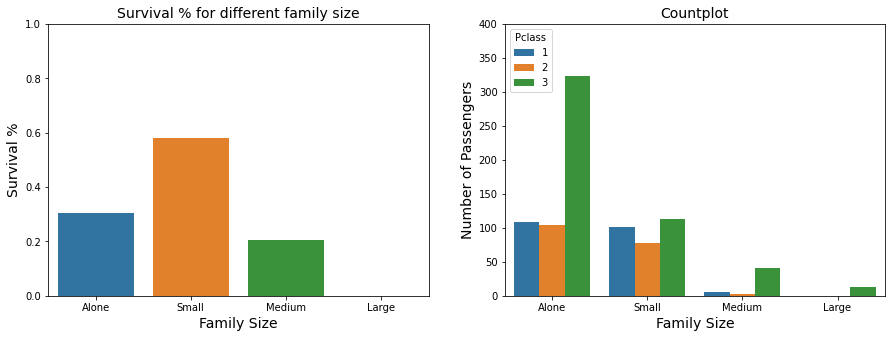

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='FamilySize',y='Survived',data=train,errwidth=0,ax=ax1)
ax1.set_title('Survival % for different family size',fontdict={'fontsize':14})
ax1.set_ylim([0,1])
ax1.set_xlabel('Family Size',fontdict={'fontsize':14})
ax1.set_ylabel('Survival %',fontdict={'fontsize':14})


sns.countplot(x='FamilySize',data=train,hue='Pclass',ax=ax2)
ax2.set_title('Countplot',fontdict={'fontsize':14})
ax2.set_ylim([0,400])
ax2.set_xlabel('Family Size',fontdict={'fontsize':14})
ax2.set_ylabel('Number of Passengers',fontdict={'fontsize':14})

plt.show()

Những gia đình nhỏ (1-3 người) có tỉ lệ người sống sót cao nhất. Người độc thân có tỉ lệ chết cao hơn người có gia đình, gia đình càng đông người thì tỉ lệ sống sót càng thấp
Bất kể tình trạng hôn nhân hay kích cỡ gia đình, khách hạng 3 có số người sống nhiều nhất. Tuy nhiên điều này có thể là do khách hạng 3 có số lượng lớn

**Ticket**

In [ ]:
train['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [ ]:
# Get first letters of the tickets
train["Ticket_first"] = train["Ticket"].apply(lambda x: str(x)[0])

# Surviving rates of first letters
print(train.groupby("Ticket_first")["Survived"].mean().sort_values(ascending=False))

Ticket_first
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Nhóm các type vé dựa vào chữ cái đầu.

* higher surviving rate = F, 1, P , 9
* neutral = S, C, 2
* lower surviving rate = còn lại

# Feature Engineering

**Grouping features**

In [ ]:
# Ticket first letters
train["Ticket"] = train["Ticket_first"]
train.drop(["Ticket"],inplace=True,axis=1)
#Age
train['Age_group'] = pd.cut(train['Age'],bins=[0,11,19,33,64,1000],labels=['Children','Adolescence','Young_Adult','Adult',"Elderly"],right=False)
train.drop(["Age"],inplace=True,axis=1)

In [ ]:
#Ticket
def label_ticket(first):
    if first in ["F", "1", "P", "9"]:
        return "High"
    elif first in ["S", "C", "2"]:
        return "Middle"
    else:
        return "Low"

#Title
def label_title(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "High"
    elif title in ["Major", "Col", "Dr"]:
        return "Middle"
    else:
        return "Low"

In [ ]:
train["Ticket_first"] = train["Ticket_first"].apply(label_ticket)
train["Title"] = train["Title"].apply(label_title)

In [ ]:
#Fare
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


**One Hot Encode**
Chuyển các feature chữ thành số

In [ ]:
train.drop(["FamilyMember","Name","Fare"],inplace=True,axis=1)

In [ ]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
train = pd.get_dummies(columns=["Ticket_first","Title","Embarked","Age_group","FamilySize","FareBand"], data=train, drop_first=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Ticket_first_Low,Ticket_first_Middle,Title_Low,Title_Middle,Embarked_Q,Embarked_S,Age_group_Adolescence,Age_group_Young_Adult,Age_group_Adult,Age_group_Elderly,FamilySize_Small,FamilySize_Medium,FamilySize_Large,"FareBand_(7.91, 14.454]","FareBand_(14.454, 31.0]","FareBand_(31.0, 512.329]"
0,0,3,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,1,3,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,0,3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0


# MODEL

In [ ]:
X = train.drop("Survived",axis=1).to_numpy()
y = train["Survived"].to_numpy()

In [ ]:
print(X.shape, y.shape)

(891, 18) (891,)


In [ ]:
# correlation
set_option('precision', 2)
cor = train.corr(method='pearson')
cor

,Survived,Pclass,Sex,Ticket_first_Low,Ticket_first_Middle,Title_Low,Title_Middle,Embarked_Q,Embarked_S,Age_group_Adolescence,Age_group_Young_Adult,Age_group_Adult,Age_group_Elderly,FamilySize_Small,FamilySize_Medium,FamilySize_Large,"FareBand_(7.91, 14.454]","FareBand_(14.454, 31.0]","FareBand_(31.0, 512.329]"
Survived,1.00e+00,-0.34,5.43e-01,-2.98e-01,4.30e-02,-0.56,1.63e-02,3.65e-03,-1.50e-01,2.67e-02,-1.30e-01,0.08,-7.68e-02,0.28,-0.09,-9.60e-02,-0.10,8.42e-02,0.23
Pclass,-3.38e-01,1.00,-1.32e-01,5.78e-01,8.55e-02,0.12,-1.51e-01,2.21e-01,7.41e-02,6.70e-02,2.31e-01,-0.33,-1.01e-01,-0.22,0.12,1.01e-01,0.21,-5.75e-02,-0.58
Sex,5.43e-01,-0.13,1.00e+00,-8.97e-02,5.18e-03,-0.88,-6.12e-02,7.41e-02,-1.19e-01,8.94e-02,-1.20e-01,0.06,-8.98e-02,0.26,0.11,8.20e-03,-0.06,8.02e-02,0.18
Ticket_first_Low,-2.98e-01,0.58,-8.97e-02,1.00e+00,-6.03e-01,0.10,-9.58e-02,2.78e-01,1.20e-01,2.18e-03,1.17e-01,-0.15,-9.48e-03,-0.16,0.20,-1.04e-01,0.06,-1.05e-01,-0.29
Ticket_first_Middle,4.30e-02,0.09,5.18e-03,-6.03e-01,1.00e+00,-0.03,-3.55e-02,-1.91e-01,2.73e-02,5.30e-02,1.79e-03,-0.07,-2.59e-02,0.06,-0.15,1.73e-01,0.21,9.10e-02,-0.20
Title_Low,-5.65e-01,0.12,-8.83e-01,1.02e-01,-3.15e-02,1.00,-1.35e-01,-7.75e-02,1.17e-01,-7.70e-02,2.26e-01,-0.03,1.01e-01,-0.30,-0.22,-7.02e-02,0.10,-1.39e-01,-0.21
Title_Middle,1.63e-02,-0.15,-6.12e-02,-9.58e-02,-3.55e-02,-0.13,1.00e+00,1.79e-03,-2.22e-02,-3.39e-02,-7.59e-02,0.12,-1.36e-02,-0.03,-0.03,-1.36e-02,-0.02,5.31e-02,0.03
Embarked_Q,3.65e-03,0.22,7.41e-02,2.78e-01,-1.91e-01,-0.08,1.79e-03,1.00e+00,-4.99e-01,-3.57e-02,1.59e-01,-0.14,2.92e-02,-0.09,0.01,-3.74e-02,-0.12,-1.09e-02,-0.16
Embarked_S,-1.50e-01,0.07,-1.19e-01,1.20e-01,2.73e-02,0.12,-2.22e-02,-4.99e-01,1.00e+00,-2.15e-02,-4.74e-02,0.05,-2.99e-02,-0.08,0.07,7.49e-02,0.22,6.07e-03,-0.09
Age_group_Adolescence,2.67e-02,0.07,8.94e-02,2.18e-03,5.30e-02,-0.08,-3.39e-02,-3.57e-02,-2.15e-02,1.00e+00,-3.16e-01,-0.20,-3.69e-02,0.06,0.03,6.42e-02,0.06,-7.18e-02,0.02


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)

[Text(0.5, 0.8333333333333334, 'X[4] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.5, 'X[0] <= 2.5\ngini = 0.408\nsamples = 364\nvalue = [104, 260]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'X[0] <= 1.5\ngini = 0.263\nsamples = 527\nvalue = [445, 82]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

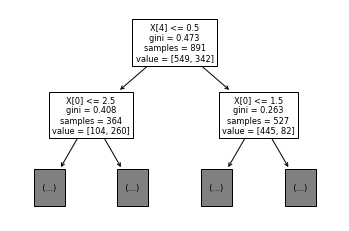

In [ ]:
from sklearn import tree
tree.plot_tree(clf, max_depth=1)

In [ ]:
clf.tree_.compute_feature_importances()

array([0.18444055, 0.02081017, 0.0251376 , 0.02262964, 0.49783756,
       0.01887889, 0.00748922, 0.02666115, 0.00790618, 0.01601445,
       0.01215724, 0.00493616, 0.02893435, 0.04695725, 0.        ,
       0.03410639, 0.01351591, 0.03158729])

Train/Validation

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
print("Train: ", X_train.shape, y_train.shape)
print("Validation: ",X_validation.shape, y_validation.shape)

Train:  (712, 18) (712,)
Validation:  (179, 18) (179,)


In [ ]:
# Test options and evaluation metric
# X_train
num_folds = 10
scoring = 'accuracy'

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
  sfolder = StratifiedKFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=sfolder, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.841393 (0.034837)
LDA: 0.848435 (0.035152)
KNN: 0.811854 (0.045911)
CART: 0.800587 (0.039867)
NB: 0.412950 (0.016245)
SVM: 0.845618 (0.035308)


In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  sfolder = StratifiedKFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=sfolder, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.844210 (0.033868)
ScaledLDA: 0.848435 (0.035152)
ScaledKNN: 0.802093 (0.045546)
ScaledCART: 0.796362 (0.043014)
ScaledNB: 0.411541 (0.017159)
ScaledSVM: 0.844249 (0.042333)


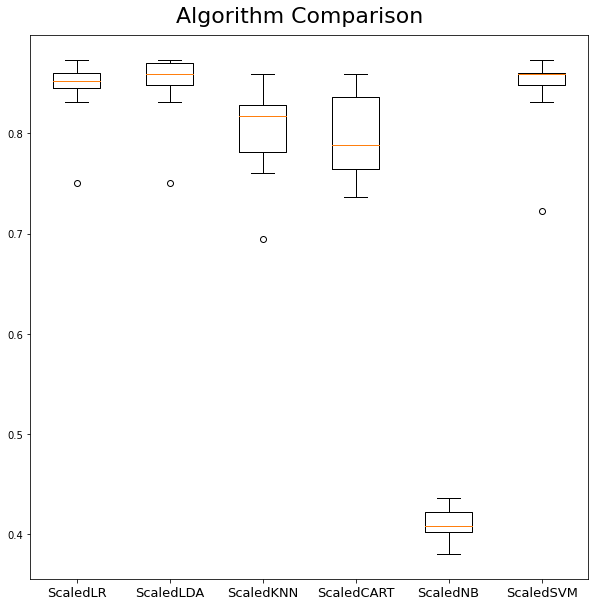

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison',fontsize=22, y=0.92)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=13)
plt.show()

In [ ]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}
sfolder = StratifiedKFold(n_splits=num_folds,random_state=seed,shuffle=True)
gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=sfolder,
                     scoring="accuracy", n_jobs= 4, verbose = 1)
gsLDA.fit(X_train,y_train)
LDA_best = gsLDA.best_estimator_

# Best score
print("Best: %f using %s" % (gsLDA.best_score_, gsLDA.best_params_))
print(gsLDA.best_estimator_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best: 0.848435 using {'solver': 'svd', 'tol': 0.0001}
LinearDiscriminantAnalysis()


In [ ]:
#SVC
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
sfolder = StratifiedKFold(n_splits=num_folds,random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=sfolder)
grid_SVC = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_SVC.best_score_, grid_SVC.best_params_))
print(grid_SVC.best_estimator_)

Best: 0.844249 using {'C': 0.7, 'kernel': 'rbf'}
SVC(C=0.7)


In [ ]:
#LR
model = LogisticRegression()
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=num_folds,random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=sfolder)
grid_LR = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_LR.best_score_, grid_LR.best_params_))
print(grid_LR.best_estimator_)

Best: 0.845618 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.1, solver='liblinear')


**Ensemble**

In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  sfolder = StratifiedKFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=sfolder, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


AB: 0.839984 (0.031980)
GBM: 0.828775 (0.047380)
RF: 0.810485 (0.049671)
ET: 0.810446 (0.042707)


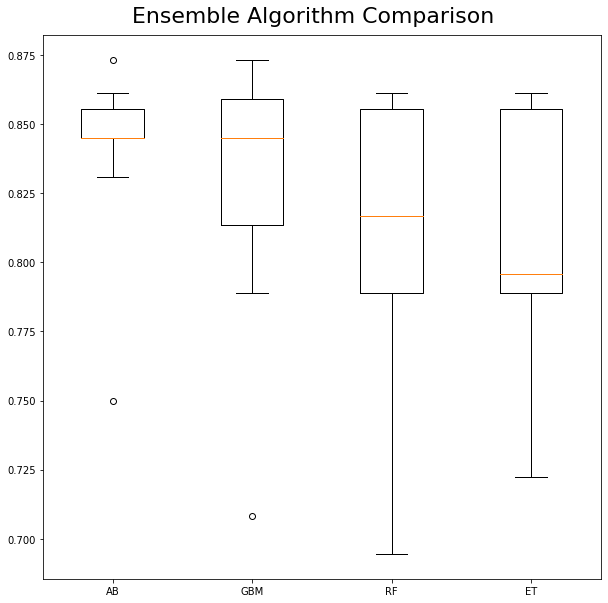

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Ensemble Algorithm Comparison',fontsize=22, y=0.92)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
param_grid = {
    "random_state": [0],   # [0, 1, 2, 3, 4],
    "n_estimators": [360], # [320, 340, 360, 380, 400],
    "max_depth": [32]      # [25, 30, 32, 34, 38, 45]
}
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_ET = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_ET.best_score_, grid_ET.best_params_))
means = grid_ET.cv_results_['mean_test_score']
stds = grid_ET.cv_results_['std_test_score']
params = grid_ET.cv_results_['params']
print("Best estimator:",grid_ET.best_estimator_)

Best: 0.825782 using {'max_depth': 32, 'n_estimators': 360, 'random_state': 0}
Best estimator: ExtraTreesClassifier(max_depth=32, n_estimators=360, random_state=0)


In [ ]:
parameters = {
    'learning_rate': [0.01,0.02,0.03],
    'n_estimators' : [100,500,1500],
    'max_depth'    : [4,6,8]
}
model = GradientBoostingClassifier(random_state=seed)
grid_GBR = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.02, max_depth=4, random_state=7)

 The best score across ALL searched params:
 0.8328651685393258

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100}


In [ ]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
model = AdaBoostClassifier(random_state=seed)
grid_AB = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid_AB.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_AB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_AB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_AB.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostClassifier(learning_rate=0.97, n_estimators=7, random_state=7)

 The best score across ALL searched params:
 0.851123595505618

 The best parameters across ALL searched params:
 {'algorithm': 'SAMME.R', 'learning_rate': 0.97, 'n_estimators': 7}


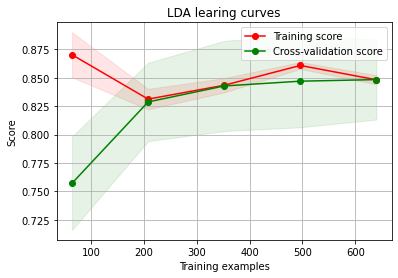

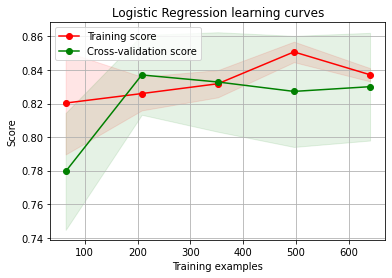

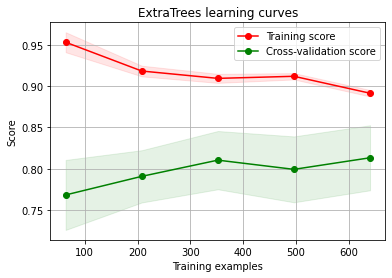

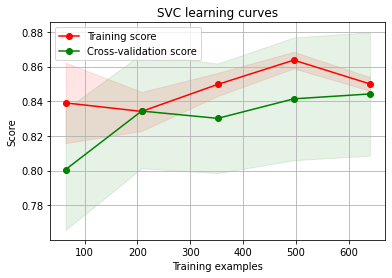

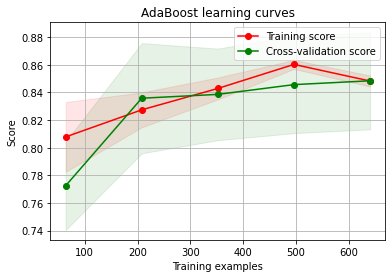

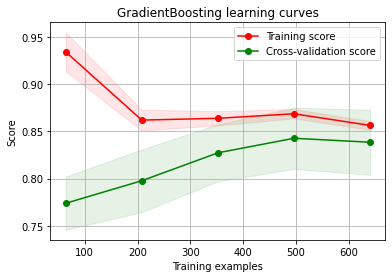

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

sfolder = StratifiedKFold(n_splits=num_folds,random_state=seed,shuffle=True)
g = plot_learning_curve(gsLDA.best_estimator_,"LDA learing curves" ,X_train,y_train,cv=sfolder)
g = plot_learning_curve(grid_LR.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=sfolder)
g = plot_learning_curve(grid_ET.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=sfolder)
g = plot_learning_curve(grid_SVC.best_estimator_,"SVC learning curves",X_train,y_train,cv=sfolder)
g = plot_learning_curve(grid_AB.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=sfolder)
g = plot_learning_curve(grid_GBR.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=sfolder)

Prediction




In [ ]:
# prepare the model
model = ExtraTreesClassifier(max_depth=32, n_estimators=360, random_state=0)
model.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=32, n_estimators=360, random_state=0)

In [1]:
predictions = model.predict(X_validation)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

NameError: ignored

In [ ]:
target_names = ["Dead", "Alive"]
clf_report = classification_report(y_validation,
                                   predictions,
                                   target_names=target_names,
                                   output_dict=True)

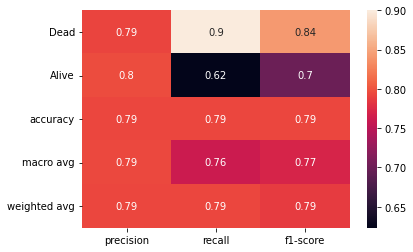

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)